In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## Chi-Squared Distributions ##

Let $Z$ be a standard normal random variable and let $V = Z^2$. By the change of variable formula for densities, we found the density of $V$ to be

$$
f_V(v) ~ = ~ \frac{1}{\sqrt{2\pi}} v^{-\frac{1}{2}} e^{-\frac{1}{2} v}, ~~~~ v > 0
$$

That's the gamma $(1/2, 1/2)$ density. It is also called the *chi-squared density with 1 degree of freedom,* which we will abbreviate to chi-squared (1).

### From Chi-Squared $(1)$ to Chi-Squared $(n)$ ###

When we were establishing the properties of the standard normal density, we discovered that if $Z_1$ and $Z_2$ are independent standard normal then $Z_1^2 + Z_2^2$ has the exponential $(1/2)$ distribution. We saw this by comparing two different settings in which the Rayleigh distribution arises. But that wasn't a particularly illuminating reason for why $Z_1^2 + Z_2^2$ should be exponential. 

But now we know that the sum of independent gamma variables with the same rate is also gamma; the shape parameter adds up and the rate remains the same. Therefore $Z_1^2 + Z_2^2$ is a gamma $(1, 1/2)$ variable. That's the same distribution as exponential $(1/2)$, as you showed in exercises. This explains why the sum of squares of two i.i.d. standard normal variables has the exponential $(1/2)$ distribution.

Now let $Z_1, Z_2, \ldots, Z_n$ be i.i.d. standard normal variables. Then $Z_1^2, Z_2^2, \ldots, Z_n^2$ are i.i.d. chi-squared $(1)$ variables. That is, each of them has the gamma $(1/2, 1/2)$ distribution. 

By induction, $Z_1^2 + Z_2^2 + \cdots + Z_n^2$ has the gamma $(n/2, 1/2)$ distribution. This is called the *chi-squared distribution with $n$ degrees of freedom,* which we will abbreviate to chi-squared $(n)$.

### Chi-Squared with $n$ Degrees of Freedom ###
For a positive integer $n$, the random variable $X$ has the *chi-squared distribution with $n$ degrees of freedom* if the distribution of $X$ is gamma $(n/2, 1/2)$. That is, $X$ has density

$$
f_X(x) ~ = ~ \frac{\frac{1}{2}^{\frac{n}{2}}}{\Gamma(\frac{n}{2})} x^{\frac{n}{2} - 1} e^{-\frac{1}{2}x}, ~~~~ x > 0
$$

Here are the graphs of the chi-squared densities for degrees of freedom 2 through 5.

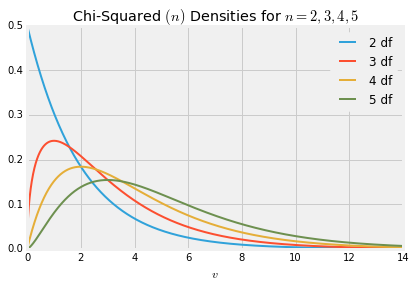

In [17]:
# HIDDEN
x = np.arange(0, 14, 0.01)
y2 = stats.chi2.pdf(x, 2)
y3 = stats.chi2.pdf(x, 3)
y4 = stats.chi2.pdf(x, 4)
y5 = stats.chi2.pdf(x, 5)
plt.plot(x, y2, lw=2, label='2 df')
plt.plot(x, y3, lw=2, label='3 df')
plt.plot(x, y4, lw=2, label='4 df')
plt.plot(x, y5, lw=2, label='5 df')
plt.legend()
plt.xlabel('$v$')
plt.title('Chi-Squared $(n)$ Densities for $n = 2, 3, 4, 5$');

The chi-squared (2) distribution is exponential because it is the gamma $(1, 1/2)$ distribution. This distribution has three names:
- chi-squared (2)
- gamma (1, 1/2)
- exponential (1/2)

### Mean and Variance ###
You know that if $T$ has the gamma $(r, \lambda)$ density then 

$$
E(T) ~ = ~ \frac{r}{\lambda} ~~~~~~~~~~~~ SD(T) = \frac{\sqrt{r}}{\lambda}
$$

If $X$ has the chi-squared $(n)$ distribution then $X$ is gamma $(n/2, 1/2)$. So

$$
E(X) ~ = ~ \frac{n/2}{1/2} ~ = ~ n
$$

Thus **the expectation of a chi-squared random variable is its degrees of freedom**.

The SD is
$$
SD(X) ~ = ~ \frac{\sqrt{n/2}}{1/2} ~ = ~ \sqrt{2n}
$$

### Estimating the Normal Variance ###
Suppose $X_1, X_2, \ldots, X_n$ are i.i.d. normal $(\mu, \sigma^2)$ variables, and that you are in a setting in which you know $\mu$ and are trying to estimate $\sigma^2$. 

Let $Z_i$ be $X_i$ in standard units, so that $Z_i = (X_i - \mu)/\sigma$. Define the random variable $T$ as follows:

$$
T ~ = ~ \sum_{i=1}^n Z_i^2 ~ = ~ \frac{1}{\sigma^2}\sum_{i=1}^n (X_i - \mu)^2
$$

Then $T$ has the chi-squared $(n)$ distribution and $E(T) = n$. Now define $W$ by

$$
W ~ = ~  \frac{\sigma^2}{n} T ~ = ~ \frac{1}{n} \sum_{i=1}^n (X_i - \mu)^2
$$

Then $W$ can be computed based on the sample since $\mu$ is known. And since $W$ is a linear tranformation of $T$ it is easy to see that $E(W) = \sigma^2$. So we have constructed an unbiased estimate of $\sigma^2$: it is the mean squared deviation from the known population mean.

But typically, $\mu$ is not known. In that case you need a different estimate of $\sigma^2$ since you can't compute $W$ as defined above. You showed in exercises that

$$
S^2 ~ = ~ \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar{X})^2
$$

is an unbiased estimate of $\sigma^2$ regardless of the distribution of the $X_i$'s. When the $X_i$'s are normal, as is the case here, it turns out that $S^2$ is a linear transformation of a chi-squared $(n-1)$ random variable. The methods of the next chapter can used to understand why.

### "Degrees of Freedom" ###
The example above helps explain the strange term "degrees of freedom" for the parameter of the chi-squared distribution. 
- When $\mu$ is known, you have $n$ independent centered normals $(X_i - \mu)$ that you can use to estimate $\sigma^2$. That is, you have $n$ degrees of freedom in constructing your estimate.
- When $\mu$ is not known, you are using all $n$ of $X_1 - \bar{X}, X_2 - \bar{X}, \ldots, X_n - \bar{X}$ in your estimate, but they are not independent. They are the deviations of the list $X_1, X_2, \ldots , X_n$ from their average $\bar{X}$, and hence their sum is 0. So if you know $n-1$ of them, the final one is determined. You only have $n-1$ degrees of freedom.